1. what kinds of bike lanes and how are they represented in OSM: https://wiki.openstreetmap.org/wiki/Bicycle
2. The highway=cycleway tag indicates a separate way for the use of cyclists. http://wiki.openstreetmap.org/wiki/Tag:highway%3Dcycleway
3. Add the cycleway=* tag to a highway=* to map cycling infrastructure that is an inherent part of the road
4. pedestrian: http://wiki.openstreetmap.org/wiki/Pedestrian

In [1]:
%matplotlib inline 
import geopandas as gp
from osmread import Node, Way, Relation
import datetime
import pandas as pd


# read osm raw

In [2]:
from utils.osm_helper import *
OSM_DC_BBOX_PATH = 'data/osm/osm_dc_bbox.osm'
OSM_DC_BBOX = osm_container(OSM_DC_BBOX_PATH)
print OSM_DC_BBOX.data_size()

begin reading osm 2016-12-17 21:48:28.419000
finish reading osm 2016-12-17 21:49:42.081000
["len of <class 'osmread.elements.Node'> = 2546260", "len of <class 'osmread.elements.Way'> = 306332", "len of <class 'osmread.elements.Relation'> = 3427"]


In [3]:
DC_OSM_IDS_PATH ='data/osm/osm_ids_within_dc_polygon.txt'
DC_OSM_IDS={}
with open(DC_OSM_IDS_PATH) as f:
    DC_OSM_IDS = eval(f.readlines()[0])
for key, value in DC_OSM_IDS.items():
    print key, len(value)
     
def dc_obj(osm_objs, osm_ids, osmtype, osmtype_str):
    return [obj for obj in osm_objs.osm_objs[osmtype] if obj.id in osm_ids[osmtype_str]]

DC_NODES = dc_obj(OSM_DC_BBOX, DC_OSM_IDS,Node, 'Node')
DC_WAYS = dc_obj(OSM_DC_BBOX, DC_OSM_IDS, Way, 'Way')
DC_RLTNS = dc_obj(OSM_DC_BBOX, DC_OSM_IDS, Relation, 'Relation')
len(DC_WAYS), len(DC_NODES), len(DC_RLTNS)

Node 1652906
Relation 2556
Way 194767


(194767, 1652906, 2556)

In [4]:
import utils.osm.osmFilter; reload(utils.osm.osmFilter)
from utils.osm.osmFilter import *

In [5]:
bk_nodes = [o for o in DC_NODES if filter_is_bike_facilities(o)]
bk_ways = [o for o in DC_WAYS if filter_is_bike_facilities(o)]
bk_rltns = [o for o in DC_RLTNS if filter_is_bike_facilities(o)]
len(bk_nodes), len(bk_ways), len(bk_rltns)
# bk_nodes[:10]

(2764, 7548, 26)

In [6]:
tag_for_pattern = ['highway', 'cycleway', 'cycleway:left', 'cycleway:right', 'cycleway:both',
     'oneway:bicycle', 'bicycle', 'bicycle:lanes', 'bicycle:backward',
     'amenity', 'foot', 'sidewalk','oneway',
    'lanes']
## TODO: highway='footway', footway=sidewalk

In [7]:

bk_type = {
    'L1a_1': [('highway','*'), ('cycleway','lane')],
    'L1a_2': [('highway','*'),('cycleway:left','lane'),('cycleway:right','lane'),],
    'L1a_3': [('highway','*'),('cycleway:both','lane'),],
    'L1b_1': [('highway','*'),('cycleway:right','lane'),('oneway:bicycle','no')],
    'L1b_2': [('highway','*'), ('cycleway','lane')],
    'L2': [('highway','*'),('cycleway:right','lane'),('-oneway:bicycle','no')],
    'M1_1': [('highway','*'),('oneway','yes'),('cycleway','lane'),('oneway:bicycle','no')],
    'M1_2': [('highway','*'),('oneway','yes'),('cycleway:left','opposite_lane'),('cycleway:right','lane')],
    'M2a_1': [('highway','*'),('oneway','yes'),('cycleway:right','lane')],
    'M2a_2': [('highway','*'),('oneway','yes'),('cycleway','lane')],
    'M2b_1': [('highway','*'),('oneway','yes'),('cycleway:left','lane'),('-oneway:bicycle','no')],
    'M2b_2': [('highway','*'),('oneway','yes'),('cycleway','lane')],
    'M2c': [('highway','*'),('oneway','yes'),('cycleway','lane'),('lanes',['2',2])],
    'M2d': [('highway','*'),('oneway','yes'),('cycleway:left','lane'),('oneway:bicycle','no'),],
    'M3a_1': [('highway','*'), ('oneway','yes'),('oneway:bicycle','no'),('cycleway:left','opposite_lane')],
    'M3a_2': [('highway','*'), ('oneway','yes'),('oneway:bicycle','no'),('cycleway','opposite_lane')],
    'M3b_1': [('highway','*'), ('oneway','yes'),('oneway:bicycle','no'),('cycleway:right','opposite_lane')],
    'M3b_2': [('highway','*'), ('oneway','yes'),('oneway:bicycle','no'),('cycleway','opposite_lane')],
    'M4_1': [('highway','*'),('oneway','yes'),('cycleway:right','lane')],
    'M4_2': [('highway','*'),('oneway','yes'),('cycleway','lane')],
    'M4_3': [('highway','*'), ('cycleway','lane')],
    'M4_3': [('highway','*'),('cycleway:left','lane'),('cycleway:right','lane'),],
    'M4_5': [('highway','*'),('cycleway:both','lane'),],
    
    'T1_1':[('highway','*'),('bicycle','use_sidepath')],
    'T1_2':[('highway','cycleway'),('oneway','yes')],
    'T1_3':[('highway','*'),('cycleway','track')],
    'T2_1':[('highway','*'),('bicycle','use_sidepath')],
    'T2_2':[('highway','cycleway'),('oneway','no')],
    'T2_3':[('highway','*'),('cycleway:right','track')],

    'T3_1':[('highway','*'),('bicycle','use_sidepath')],
    'T3_2':[('highway','cycleway'),('oneway','no')],
    'T3_3':[('highway','*'),('oneway','yes'),('cycleway:right','track'),('oneway:bicycle','no')],    

    'T4_1':[('highway','*'),('bicycle','use_sidepath')],
    'T4_2':[('highway','cycleway'),('oneway','yes')],
    'T4_3':[('highway','*'),('cycleway:right','track')],    
    
    'S1_1':[('highway','*'),('oneway','yes'),('oneway:bicycle','no')],
    'S1_2':[('highway','*'),('oneway','yes'),('cycleway','opposite')],
    
    
    'foot':[('highway','footway'),],
    'pedestrian': [('highway','pedestrian'),],
    'sidewalk':[('sidewalk','*'),],
    'M2d_my': [('highway','service'), ('cycleway:left','opposite_lane'), ('oneway','yes')],
    'M1_my':[('highway','secondary'), ('cycleway','opposite_lane'), ('bicycle','designated'), ('oneway','yes'), ('lanes','1')]
    
} 



In [8]:
tags_ways = []
for w in bk_ways:
    tags_ways.append([w.id]+[w.tags.get(t,None) for t in tag_for_pattern])


In [9]:
vectors = pd.DataFrame(tags_ways, columns=['id']+tag_for_pattern)

In [10]:
def pattern(row):
    a =row.dropna()[1:]
    return tuple(['{}={}'.format(k,v) for k,v in zip(a.index.tolist(), a.tolist())])


In [11]:
vectors['pattern']=vectors.apply(pattern,axis=1)

In [56]:
pattern2category = pd.read_csv('bk_pattern2category.tsv',sep='\t')
pattern2category.pattern = pattern2category.pattern.apply(eval)
pattern2category.shape

(453, 7)

In [57]:
vectors.shape

(7548, 16)

In [59]:
vectors = vectors.merge(pattern2category_new,left_on='pattern',right_on='pattern',how='left')
vectors.shape

(7548, 22)

In [148]:
bike_facilities_id = set(vectors[vectors.bikable!='no'].id)

In [539]:
vectors[vectors.id==112192545]

,id,highway,cycleway,cycleway:left,cycleway:right,cycleway:both,oneway:bicycle,bicycle,bicycle:lanes,bicycle:backward,...,sidewalk_x,oneway,lanes,pattern,cycle_lane,is_shared,cycle_way,sidewalk_y,bikable,description
2101,112192545,tertiary,None,shared_lane,lane,None,None,None,None,None,...,both,None,2,"(highway=tertiary, cycleway:left=shared_lane, ...",one,NaN,NaN,both,NaN,"one way cycle lane, two way sidewalk"


## preliminary pattern

In [524]:
bk_tps = bk_type.keys()
result = []
for way in bk_ways:
#     result.append([and_filter(way,bk_type[tp]) for tp in bk_tps])
    result.append((way.id, ','.join([tp for tp in bk_tps if and_filter(way,bk_type[tp])  ])))
# df = pd.DataFrame(result, columns=bk_tps)
df = pd.DataFrame(result, columns=['id','type'])
p = []
for pattern, grp in df.merge(vectors[['id','pattern']]).groupby('pattern'):
    p.append( (pattern, '##'.join(list(set(grp['type'].values))), grp.shape[0]))
# pd.DataFrame(p).sort(2, ascending=False).to_csv('bk_pattern.csv')

In [571]:
m = df.merge(vectors[['id','pattern']])
m[m.pattern==
('highway=residential', 'cycleway=track', 'bicycle=designated', 'lanes=2')

 ]

,id,type,pattern
2592,132577607,T1_3,"(highway=residential, cycleway=track, bicycle=..."


In [63]:
import sys, os
sys.path.insert(0, os.path.abspath('../'))
from utils.osm.osm2shp import *


In [64]:
dc_segments = gp.read_file('data/opendc_segments.geojson')

In [504]:
pts = [(nd.id, nd.tags, node2pt(nd),'Node') for nd in bk_nodes]
pts_gpdf = gp.GeoDataFrame(pts, columns=['id','tag', 'geometry','type'])
lns = [(way.id, way.tags, way2lineOrpoly(OSM_DC_BBOX, way),'Way') for way in bk_ways]
lns_gpdf = gp.GeoDataFrame(lns, columns=['id','tag', 'geometry','type'])


In [505]:
rltn_pts = []
rltn_lns = []

for r in bk_rltns:
    shps = rltn2dictShp(OSM_DC_BBOX,r)
    cnt = 0
    pts = [(r.id,'{}_{}'.format(r.id,i+cnt), r.tags, pt, 'Relation') for i, pt in enumerate(shps['Point'])]
    rltn_pts.extend(pts)
    cnt+=len(shps['Point'])
    lns = [(r.id,'{}_{}'.format(r.id,i+cnt), r.tags, pt, 'Relation') for i, pt in enumerate(shps['LineString'])]
    rltn_lns.extend(lns)
    cnt+=len(shps['LineString'])
    polys = [('{}_{}'.format(r.id,i+cnt), r.tags, pt, 'Relation') for i, pt in enumerate(shps['Polygon'])]
    rltn_lns.extend(polys)
    
# rltn_pts = pd.DataFrame(rltn_pts, columns=['id','id_keep','tag','geometry','type']).merge(category_in_dc_df)
# rltn_pts = rltn_pts.drop(['id','has_category'], axis=1)
# rltn_pts.columns = ['id','tag','geometry','type','category']

# rltn_lns = pd.DataFrame(rltn_lns, columns=['id','id_keep','tag','geometry','type']).merge(category_in_dc_df)
# rltn_lns = rltn_lns.drop(['id','has_category'], axis=1)
# rltn_lns.columns = ['id','tag','geometry','type','category']


In [506]:
rltn_pts_df = pd.DataFrame(rltn_pts,columns=['id','tag','geometry','type'])
rltn_lns_df = pd.DataFrame(rltn_lns,columns = ['id','tag','geometry','type'])

In [507]:
pts_merged = pts_gpdf.append(rltn_pts_df,ignore_index=True)
lns_merged = lns_gpdf.append(rltn_lns_df,ignore_index=True)

In [508]:
pts_merged.crs = {'init': u'epsg:4326', 'no_defs': True}
lns_merged.crs = {'init': u'epsg:4326', 'no_defs': True}

In [509]:
dc_segments_bfr20 = dc_segments.to_crs(epsg=3559)

In [510]:
dc_segments_bfr20.geometry = dc_segments_bfr20.buffer(20)


In [511]:
# lns_merged = lns_merged[lns_merged.id.isin(bike_facilities_id)]
print lns_merged.shape
lns_merged_crs = lns_merged.to_crs(epsg=3559)
dc_segments_crs = dc_segments.to_crs(epsg=3559)

(7608, 4)


In [512]:
sjoin = gp.tools.sjoin(dc_segments_bfr20, lns_merged_crs)
sjoin.crs, sjoin.shape, lns_merged_crs.shape

({'init': 'epsg:3559', 'no_defs': True}, (33329, 26), (7608, 4))

In [513]:
adf = sjoin[['STREETSEGID','id','geometry']].merge(dc_segments_crs[['STREETSEGID','geometry']], left_on='STREETSEGID', right_on='STREETSEGID')
adf = adf.merge(lns_merged_crs.drop('tag',axis=1),left_on='id',right_on='id')
adf.columns = [u'STREETSEGID', u'id', u'geometry_seg_bfr', u'geometry_seg', u'geometry_osm', u'type']
adf[adf.STREETSEGID.isin([876,10824])]

,STREETSEGID,id,geometry_seg_bfr,geometry_seg,geometry_osm,type
0,876,6060492,"POLYGON ((398912.3642750882 142565.1483322567,...",LINESTRING (398925.8415719268 142548.615571075...,LINESTRING (399219.2720089791 142722.965105728...,Way
1,10824,6060492,"POLYGON ((399207.1940460324 142703.6292555482,...",LINESTRING (399219.0716272215 142723.845613301...,LINESTRING (399219.2720089791 142722.965105728...,Way
11,10824,6060035,"POLYGON ((399207.1940460324 142703.6292555482,...",LINESTRING (399219.0716272215 142723.845613301...,LINESTRING (399321.2075351905 142719.292404369...,Way


In [514]:
import math
def dot(vA, vB):
    return vA[0]*vB[0]+vA[1]*vB[1]
def ang(lineA, lineB):
    # Get nicer vector form
    vA = [(lineA[0][0]-lineA[1][0]), (lineA[0][1]-lineA[1][1])]
    vB = [(lineB[0][0]-lineB[1][0]), (lineB[0][1]-lineB[1][1])]
    # Get dot prod
    dot_prod = dot(vA, vB)
    # Get magnitudes
    magA = dot(vA, vA)**0.5
    magB = dot(vB, vB)**0.5
    if magA==0 or magB==0:
        return 0
    # Get cosine value
    cos_ = dot_prod/magA/magB 
    cos_ = cos_ if cos_<1 else 1
    cos_ = cos_ if cos_>-1 else -1
#     print magA, magB, dot_prod, cos_
    # Get angle in radians and then convert to degrees
    angle = math.acos(cos_)
    # Basically doing angle <- angle mod 360
    ang_deg = math.degrees(angle)%360

    if ang_deg-180>=0:
#         return 360 - ang_deg
        ang_deg = 360 - ang_deg
    if ang_deg>90:
        return 180-ang_deg
    return ang_deg

In [515]:
def filter_lns_by_angle(ln, seg, ang_thres=10):
    pts = [Point(pt) for pt in ln.coords]
    projs = [seg.project(pt) for pt in pts]
    proj_ln = LineString([seg.interpolate(pt) for pt in projs])
    ln_coords = ln.coords
    proj_ln_coords = proj_ln.coords
    sublns = zip(ln_coords[:-1],ln_coords[1:])
    subprojlns = zip(proj_ln_coords[:-1],proj_ln_coords[1:])
    keep_pts = []
    keep_ln_len = 0.0
    for i in range(len(sublns)):
        if LineString(subprojlns[i]).length!=0 and ang(sublns[i],subprojlns[i])<ang_thres:
#             print ang(sublns[i],subprojlns[i]), ang_thres
            keep_pts.extend(sublns[i])
            keep_ln_len+=LineString(sublns[i]).length
    return keep_pts, keep_ln_len

In [516]:
from shapely.geometry import Point, LineString, Polygon
def len_cvr(row,ang_thres=10):
    seg = row.geometry_seg
    seg_length = seg.length
    seg_bfr = row.geometry_seg_bfr
    osm_ln = row.geometry_osm
    osm_ln = osm_ln.exterior if isinstance(osm_ln, Polygon) else osm_ln
    intersected_ln = osm_ln.intersection(seg_bfr)
    if isinstance(intersected_ln,LineString):
        intersected_ln = [intersected_ln]
    proj_positions = []
    intersected_ln_len = 0
    for ln in intersected_ln:
        keep_pts,keep_ln_len = filter_lns_by_angle(ln, seg, ang_thres)
        proj_positions.extend([seg.project(Point(pt_coords)) for pt_coords in keep_pts])
        intersected_ln_len += keep_ln_len
    if len(proj_positions)==0:
        return 0
    cover_len = max(proj_positions)-min(proj_positions)
    cover_len = cover_len if cover_len<intersected_ln_len else intersected_ln_len
#     return intersected_ln
    return cover_len/seg_length

adf['len_prcnt'] = adf.apply(len_cvr, axis=1)
# adf.loc[[772]].apply(len_cvr, axis=1)
# adf[adf.STREETSEGID==8755].apply(len_cvr,axis=1)

,STREETSEGID,id,geometry_seg_bfr,geometry_seg,geometry_osm,type,len_prcnt
772,4447,385380666,"POLYGON ((398930.3176307577 136007.9099901246,...",LINESTRING (398943.7117234197 136027.844247719...,"POLYGON ((398931.9062568073 136010.9158626902,...",Way,0.140219


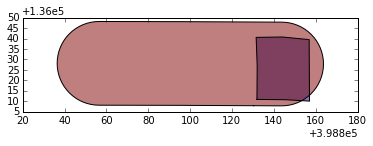

In [517]:
# test case for calibration of len_cvr function
gp.GeoDataFrame(adf[772:773].geometry_osm.values.tolist()+adf[772:773].geometry_seg_bfr.values.tolist(),columns=['geometry']).plot()
adf[772:773]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000003AA2CC50>]], dtype=object)

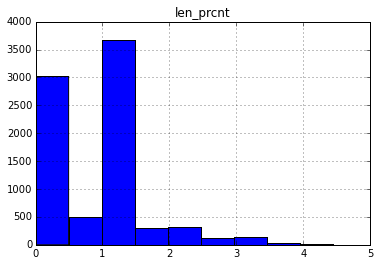

In [519]:
adf[['STREETSEGID','len_prcnt']].groupby('STREETSEGID').agg(sum).hist()

In [540]:
adf.shape

(33329, 7)

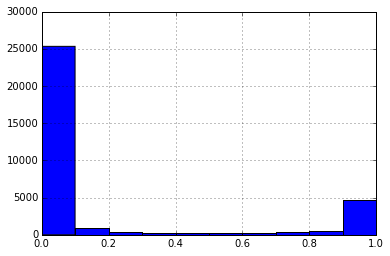

In [541]:
adf['len_prcnt'].hist()

In [546]:
sum_len = adf[adf.len_prcnt>0.3][['STREETSEGID','len_prcnt']].groupby('STREETSEGID').agg(sum)
a = sum_len[sum_len.len_prcnt>0.8].index.tolist()

# test effect of different parameters
# sum_len = adf[adf.len_prcnt>0.2][['STREETSEGID','len_prcnt']].groupby('STREETSEGID').agg(sum)
# b = sum_len[sum_len.len_prcnt>0.8].index.tolist()
# len(a), len(b), len(set(b)-set(a))

In [547]:
dc_segments.shape

(13522, 23)

In [522]:
dc_overlap_ids = set(sum_len[sum_len.len_prcnt>0.8].index)
lns_overlap_ids = set(adf[adf.STREETSEGID.isin(dc_overlap_ids)].id)
len(dc_overlap_ids), len(lns_overlap_ids)

(4769, 5072)

In [548]:
adfv = adf[(adf.STREETSEGID.isin(dc_overlap_ids))&(adf.len_prcnt>0.3)].merge(
    vectors[['id',u'cycle_lane', u'is_shared', u'cycle_way',u'sidewalk_y', u'bikable']],left_on='id',right_on='id')

TODO :
so far, the coverage only include bk_ways, need to include relation


In [552]:
aaa = set([segid for segid, grp in adfv.groupby('STREETSEGID')])

In [553]:
dc_overlap_ids-aaa

{3517, 5418}

In [549]:
result = []
cols = ['cycle_lane','is_shared','cycle_way','sidewalk_y','bikable']
for segid, grp in adfv.groupby('STREETSEGID'):
    
    result.append(tuple([segid]+[tuple(x for x in grp[c].values if not pd.isnull(x)) for c in cols]))
#     break
result = pd.DataFrame(result,columns=['STREETSEGID']+cols)

In [550]:
result.cycle_lane.apply(lambda x: 'both' if x==('both',) or len(x)>1 else x if len(x)==0 else x[0]).value_counts()

()       3993
both      437
one       309
right      28
dtype: int64

In [526]:
result.is_shared.apply(lambda x: 1 if len(x)>0 else 0).value_counts()

0    4716
1      51
dtype: int64

In [527]:
result.cycle_way.apply(lambda x: 'both' if x==('both',) or len(x)>1 else '' if len(x)==0 else x[0]).value_counts()

         4470
both      216
one        72
right       9
dtype: int64

In [529]:
result.sidewalk_y.apply(lambda x: 'both' if x==('both',) or len(x)>1 else '' if len(x)==0 else x[0]).value_counts()

both     3101
         1107
no        287
right     147
left      125
dtype: int64

In [538]:
result.bikable.apply(lambda x: 'yes' if 'yes' in x else '' if len(x)==0 else 'no' ).value_counts()

       3829
yes     912
no       26
dtype: int64

In [545]:
dc_segments['color'] = '#ee0'
lns_merged_vis = lns_merged.copy()
lns_merged_vis['color'] = lns_merged_vis.apply(lambda x: {'Way':'#00F','Relation':'#0FF'}[x.type], axis=1)
lns_merged_vis.tag = lns_merged_vis.tag.apply(str)

# split_vis = split.copy()
# split_vis['color'] = '#00f'

pts_merged_vis = pts_gpdf.copy()
pts_merged_vis.geometry = pts_merged_vis.buffer(0.0001)
pts_merged_vis['color'] = pts_merged_vis.apply(lambda x: {'Node':'#F00', 'fq':'#0F0', 'Node_fq':'#FF0','Relation_fq':'#FF0', 'Relation':'#0FF'}[x.type],axis=1)
pts_merged_vis.tag = pts_merged_vis.tag.apply(lambda x: str({k.encode('utf-8'):v.encode('utf-8') for k, v in x.items()}) if type(x)==dict else x.encode('utf-8'))

import utils.leaflet_creation_v2;reload(utils.leaflet_creation_v2)
from utils.leaflet_creation_v2 import get_color_for_df, create_map_visualization
html_title = 'bk_osm'
file_path = 'data/'
file_name = 'bk_osm'
lon, lat = -77.0163424758, 38.9047829846
zoom = 12
init_layer = ['light']
map_layer = ['light','streets','satellite']
binding_data = [['pts', 'points'], ['osm_lns','osm lines'],['dc_segments','dc_segments'],
#                 ['split_vis','split_vis'],
                ['lns_merged_vis','lns_merged_vis']]
# gpdfs = [pts_merged_vis, lns_merged_vis,dc_segments]
# gpdfs = [pts_merged_vis, lns_merged_vis.loc[lns_overlap_ids],dc_segments.loc[dc_overlap_ids], split_vis, lns_merged_vis[~lns_merged_vis.index.isin(lns_overlap_ids)]]
gpdfs = [pts_merged_vis, 
         lns_merged_vis[lns_merged_vis.id.isin(lns_overlap_ids)],
         dc_segments[dc_segments.STREETSEGID.isin(dc_overlap_ids)], 
#          split_vis, 
         lns_merged_vis]
         
create_map_visualization(html_title, file_path, file_name, lat, lon, zoom, init_layer, map_layer, binding_data, gpdfs) 

In [452]:
result[['cycle_lane','is_shared']].apply(tuple,axis=1).value_counts()

((), ())                      3966
((both,), ())                  328
((one,), ())                   308
((both,), (1.0,))               41
((one, one), ())                36
((right,), ())                  26
((both, both), ())              12
((both, both), (1.0, 1.0))       7
((right, right), ())             6
((both, one, one), ())           2
((right,), (1.0,))               2
((both, one), ())                2
((one,), (1.0,))                 1
((both, both, both), ())         1
((one, one, one), ())            1
((one, one, one, one), ())       1
dtype: int64

In [533]:
result[result.cycle_lane==('one','one','one')]
result[result.cycle_lane==('one','one')]
result[result.cycle_lane==('both', 'one','one')]
# result[result.cycle_lane==('one', 'one', 'right', 'one')]
result[result.cycle_lane==('right', 'right')]
# result[result.cycle_lane==('one', 'one', 'one', 'one')]
# result[result.cycle_lane==('both', 'both')]

result[result.bikable==('yes', 'no')]


,STREETSEGID,cycle_lane,is_shared,cycle_way,sidewalk_y,bikable
39,94,(),(),(),"(both, both)","(yes, no)"
2189,6129,(),(),(),(),"(yes, no)"
2778,7822,(),(),(),(),"(yes, no)"
2882,8128,(),(),(),(),"(yes, no)"
3145,8871,(),(),(),(),"(yes, no)"
3536,10018,(),(),(),(),"(yes, no)"


# one case explore

,BEGINMEASURE,DIRECTIONALITY,ENDMEASURE,FACILITYID,FROMADDRESSLEFTTHEO,FROMADDRESSRIGHTTHEO,FROMNODEID,OBJECTID,OBJECTID_1,QUADRANT,...,SHAPE_Length,SOURCEID,STREETID,STREETSEGID,STREETTYPE,TOADDRESSLEFTTHEO,TOADDRESSRIGHTTHEO,TONODEID,UPDATETIMESTAMP,geometry
245,0,2,170.947533,SEGID-94,100,101,14593,246,341,NW,...,170.947563,10070010,100070,94,ST,198,199,14594,2005-11-01T12:55:46,LINESTRING (-77.02191028459816 38.890545942886...


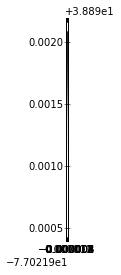

In [534]:
segid = 94	
dc_segments[dc_segments.STREETSEGID==segid].plot()
# list(dc_segments[dc_segments.STREETSEGID==segid].geometry.values[0].coords)
dc_segments[dc_segments.STREETSEGID==segid]

In [535]:
print '\n'.join(adf[(adf.STREETSEGID==segid)&(adf.len_prcnt>0.3)].apply(lambda x: 'http://www.openstreetmap.org/{}/{}'.format(x['type'].lower(), x['id']),axis=1).tolist())
adf[(adf.STREETSEGID==segid)&(adf.len_prcnt>0.3)].merge(vectors)

http://www.openstreetmap.org/way/6055608
http://www.openstreetmap.org/way/371698721
http://www.openstreetmap.org/way/371698717
http://www.openstreetmap.org/way/397321697


,STREETSEGID,id,geometry_seg_bfr,geometry_seg,geometry_osm,type,len_prcnt,highway,cycleway,cycleway:left,...,sidewalk_x,oneway,lanes,pattern,cycle_lane,is_shared,cycle_way,sidewalk_y,bikable,description
0,94,6055608,"POLYGON ((398079.1438273705 135870.8759965343,...",LINESTRING (398099.1653689793 135856.054256225...,LINESTRING (398099.4258988897 135754.266359364...,Way,0.623815,secondary,None,None,...,both,None,6,"(highway=secondary, sidewalk=both, lanes=6)",NaN,NaN,NaN,both,NaN,two way sidewalk
1,94,371698721,"POLYGON ((398079.1438273705 135870.8759965343,...",LINESTRING (398099.1653689793 135856.054256225...,LINESTRING (398083.9502436844 135868.874566704...,Way,0.701696,footway,None,None,...,None,None,None,"(highway=footway, foot=yes)",NaN,NaN,NaN,NaN,yes,footway
2,94,371698717,"POLYGON ((398079.1438273705 135870.8759965343,...",LINESTRING (398099.1653689793 135856.054256225...,LINESTRING (398114.7309605903 136014.498375108...,Way,0.865372,footway,None,None,...,None,None,None,"(highway=footway, bicycle=no, foot=yes)",NaN,NaN,NaN,NaN,no,foot_nobk
3,94,397321697,"POLYGON ((398079.1438273705 135870.8759965343,...",LINESTRING (398099.1653689793 135856.054256225...,LINESTRING (398097.4545492663 135962.717341751...,Way,0.371338,secondary,None,None,...,both,None,7,"(highway=secondary, sidewalk=both, lanes=7)",NaN,NaN,NaN,both,NaN,two way sidewalk


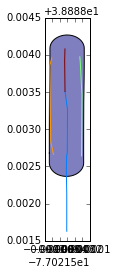

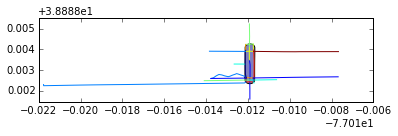

In [536]:
# dc_segments[dc_segments.STREETSEGID==segid][['geometry']].append(lns_merged[lns_merged.id.isin(adf[adf.STREETSEGID==segid].id)]).plot()
gp.GeoDataFrame(dc_segments[dc_segments.STREETSEGID==segid][['geometry']].to_crs(epsg=3559).buffer(20).to_crs(epsg=4326),columns=['geometry']).append(lns_merged[lns_merged.id.isin(adf[(adf.STREETSEGID==segid)&(adf.len_prcnt>0.3)].id)]).plot()
gp.GeoDataFrame(dc_segments[dc_segments.STREETSEGID==segid][['geometry']].to_crs(epsg=3559).buffer(20).to_crs(epsg=4326),columns=['geometry']).append(lns_merged[lns_merged.id.isin(adf[adf.STREETSEGID==segid].id)]).plot()

# abandon stuff

## try to assign osm attributes to DCSeg by area of overlap. 
But it has many noise because of the crossing, or some osm is polygons

In [159]:
dc_segment_bfr = dc_segments.to_crs(epsg=3559)
lns_merged_bfr = lns_merged.to_crs(epsg=3559)
dc_segment_bfr.shape, lns_merged_bfr.shape
dc_segment_bfr.geometry = dc_segment_bfr.buffer(10)
lns_merged_bfr.geometry = lns_merged_bfr.buffer(10)
def get_area_percentage(x):
    area_left = x.geometry_x.area
    area_right = x.geometry_y.area
    return x.area/area_left if area_left<area_right else x.area/area_right

import pandas as pd

def get_overlap(left_gdf, right_gdf):
    jgdf = gp.tools.sjoin(left_gdf, right_gdf, how='left')
#     jgdf = jgdf.rename(columns={'geometry':'geometry_left'})
    jgdf_intrsetn = pd.merge(jgdf,right_gdf[['geometry']],left_on='index_right',right_index = True)
#     print jgdf_intrsetn.columns
    jgdf_intrsetn['intersection']=jgdf_intrsetn.apply(lambda x: x.geometry_x.intersection(x.geometry_y),axis=1)
    jgdf_intrsetn['area'] = jgdf_intrsetn['intersection'].apply(lambda x: x.area)
    jgdf_intrsetn['area_prcnt'] = jgdf_intrsetn.apply(get_area_percentage, axis=1)
    return jgdf_intrsetn

overlap_df= get_overlap(dc_segment_bfr, lns_merged_bfr)

((13522, 22), (7053, 4))

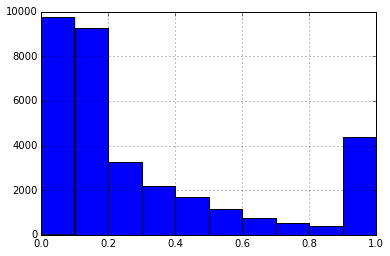

In [74]:

overlap_df.area_prcnt.hist()
overlap_df[(overlap_df.id==392135131)&((overlap_df.STREETSEGID==5942)|(overlap_df.STREETSEGID==8079))].apply(lambda x: (x.geometry_x.area, x.geometry_y.area,x.geometry_x.intersection(x.geometry_y).area), axis=1)
overlap_df[(overlap_df.id==392135140)&((overlap_df.STREETSEGID==52)|(overlap_df.STREETSEGID==8369))]


In [ ]:
low, up = 0.5, 0.8
low, up = 0.5, 1
low, up = 0.8, 1
# low, up = 0., .1

dc_overlap_ids = set(overlap_df[(overlap_df.area_prcnt>low)&(overlap_df.area_prcnt<=up)].index)
lns_overlap_ids = set(overlap_df[(overlap_df.area_prcnt>low)&(overlap_df.area_prcnt<=up)].index_right)
len(dc_overlap_ids), len(lns_overlap_ids)

## try to cut linestring by angle
but it doesn't work well because segment itself cound have large angle

Solution: keep linestring within the buffer range of segment, and use projection to mitigate the angle issue

In [312]:
# from shapely.geometry import Polygon, 


def split_linestring_by_large_angle(to_split_line, ang_thres=70):
    new_lines = []
    from shapely.geometry import LineString
    from shapely.ops import linemerge
    ln_coords = to_split_line.coords if isinstance(to_split_line, LineString) else to_split_line
    ln_coords = ln_coords.exterior.coords if isinstance(ln_coords, Polygon) else ln_coords
    sublns = zip(ln_coords[:-1],ln_coords[1:])
    new_line = [sublns[0]]
    for i in range(len(sublns)-1):
#         print sublns[i],sublns[i+1]
#         print ang(sublns[i],sublns[i+1]) 
        
        if ang(sublns[i],sublns[i+1]) < ang_thres:
            new_line.append(sublns[i+1])
        else:
            new_lines.append(linemerge(new_line))
            new_line = [sublns[i+1]]
    new_lines.append(linemerge(new_line))
    return new_lines
# lns_merged.apply(lambda x: len(split_linestring_by_large_angle(x.geometry))>1,axis=1)

# print lns_merged.loc[6560]
# split_linestring_by_large_angle(lns_merged.loc[0].geometry)
split = lns_merged[lns_merged.apply(lambda x: len(split_linestring_by_large_angle(x.geometry))>1,axis=1)]

In [397]:
ln = lns_merged[lns_merged.id==168484390].to_crs(epsg=3559).geometry.values[0]
ln2 = dc_segments[dc_segments.STREETSEGID==158].to_crs(epsg=3559).geometry.values[0]

In [406]:
dist_thres=25
seg = ln2
seg_length = seg.length
osm_ln = ln
osm_ln = osm_ln.exterior if isinstance(osm_ln, Polygon) else osm_ln
pts = [Point(pt) for pt in osm_ln.coords]
print len(pts)
pts = [pt for pt in pts if pt.distance(seg)<dist_thres]
print (len(pts))
proj_positions = [seg.project(pt) for pt in pts]
print proj_positions
cover_len = max(proj_positions)-min(proj_positions)
cover_len/seg_length
pts = [seg.interpolate(pt) for pt in proj_positions]
a = gp.GeoDataFrame(pts,columns=['geometry'])
a.crs = {'init':'epsg:3559'}
a.buffer(10).to_crs(epsg=4326).append(dc_segments[dc_segments.STREETSEGID==158].geometry).plot()

20
7
[164.1871952417697, 175.64936047995783, 271.8160792848538, 309.63887917028796, 354.84983598767525, 372.1404696138501, 422.7791862318039]


0.5927940497187876

In [326]:
geom = []
ln = LineString([(0,0),(0,1),(0.5,3)])
pts = [Point(0,0), Point(0,1), Point(0.5,3), Point(1,3),Point(0,3), Point(0,2), Point(0,0.2)]
geom.append(ln)
geom.extend(pts)
for pt in pts:
    print pt, ln.project(pt), ln.interpolate(ln.project(pt))
    geom.append( ln.interpolate(ln.project(pt)))

POINT (0 0) 0.0 POINT (0 0)
POINT (0 1) 1.0 POINT (0 1)
POINT (0.5 3) 3.06155281281 POINT (0.5 3)
POINT (1 3) 3.06155281281 POINT (0.5 3)
POINT (0 3) 2.94028500029 POINT (0.4705882352941176 2.882352941176471)
POINT (0 2) 1.97014250015 POINT (0.2352941176470588 1.941176470588235)
POINT (0 0.2) 0.2 POINT (0 0.2)


In [327]:
ln.length

3.0615528128088303

In [329]:
geom.append(ln_projed)

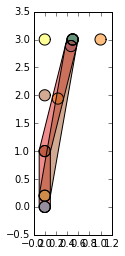

In [330]:
gp.GeoDataFrame(geom, columns=['geometry']).buffer(0.1).plot()

In [323]:
2.94028500029 - 0.9

2.04028500029

In [328]:
ln_projed = LineString([ (0.4705882352941176,2.882352941176471),(0 ,0.2)])
ln_projed.length

2.723319773408054

In [ ]:
POINT (0 3) 2.94028500029 

In [ ]:
POINT (0 1.1) 1.09701425001 POINT (0.02352941176470589 1.094117647058824)